# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [29]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [30]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
img = cv2.imread("image.jpeg")

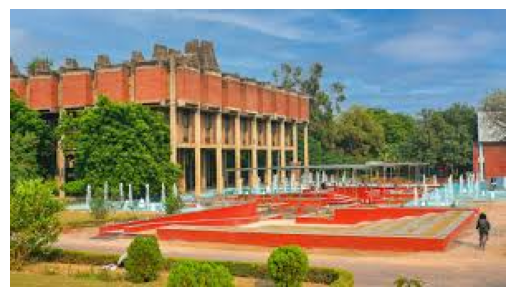

In [32]:
# Display in RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

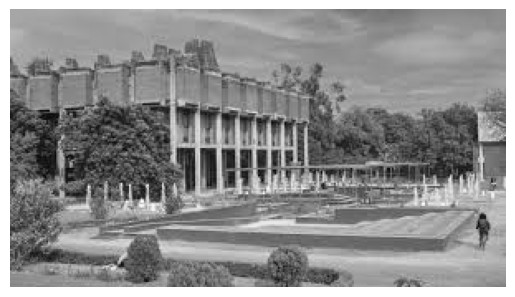

In [33]:
# Grayscale using weighted sum formula
r,g,b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
weighted_gray = 0.299 * r + 0.587 * g + 0.114 * b
plt.imshow(weighted_gray, cmap='gray')
plt.axis("off")
plt.show()

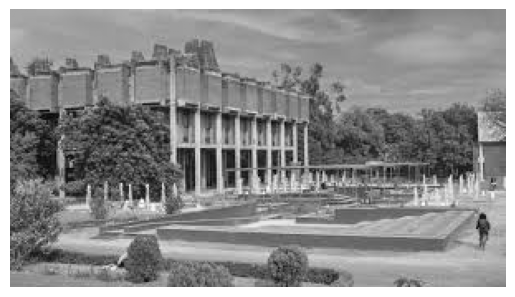

In [34]:
# Grayscale using cvtColor function
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.show()

In [35]:
print(weighted_gray)

[[165.974 165.974 165.974 ... 138.793 139.864 139.864]
 [165.974 165.974 165.974 ... 139.793 139.864 139.864]
 [165.974 165.974 165.974 ... 139.793 139.864 140.864]
 ...
 [138.232 138.232 138.232 ... 138.341 138.982 140.982]
 [132.232 132.232 132.232 ... 133.259 132.786 132.786]
 [138.232 138.232 139.232 ... 130.074 129.302 127.302]]


In [36]:
weighted_gray[0].dtype

dtype('float64')

In [37]:
print(img_gray)

[[166 166 166 ... 139 140 140]
 [166 166 166 ... 140 140 140]
 [166 166 166 ... 140 140 141]
 ...
 [138 138 138 ... 138 139 141]
 [132 132 132 ... 133 133 133]
 [138 138 139 ... 130 129 127]]


In [38]:
img_gray[0].dtype

dtype('uint8')

In [39]:
print(weighted_gray==img_gray) # Comparing output

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [40]:
# Prinitng array shapes
print("RGB Image Shape: ", img_rgb.shape)
print("Grayscale Image Shape: ", img_gray.shape)

RGB Image Shape:  (168, 300, 3)
Grayscale Image Shape:  (168, 300)


In [41]:
# Printing few pixels for both RGB and Grayscale image
print(img_rgb[:4,:4,:])

[[[130 174 219]
  [130 174 219]
  [130 174 219]
  [130 174 219]]

 [[130 174 219]
  [130 174 219]
  [130 174 219]
  [130 174 219]]

 [[130 174 219]
  [130 174 219]
  [130 174 219]
  [130 174 219]]

 [[130 174 219]
  [130 174 219]
  [130 174 219]
  [130 174 219]]]


In [42]:
print(img_gray[:1,:1])

[[166]]


In [43]:
print(img_rgb[:6,:2,:])

[[[130 174 219]
  [130 174 219]]

 [[130 174 219]
  [130 174 219]]

 [[130 174 219]
  [130 174 219]]

 [[130 174 219]
  [130 174 219]]

 [[128 175 219]
  [128 175 219]]

 [[128 175 219]
  [128 175 219]]]


In [44]:
print(img_gray[:2,:3])

[[166 166 166]
 [166 166 166]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [45]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [46]:
 #B1
f = np.fft.fft2(img_gray) # Computing FFT of Grayscale image
fshift = np.fft.fftshift(f) # To rearrange the axis from [0, Fs] to [-Fs/2, Fs/2] allowing low frequency component in FFT to move from edges to centre

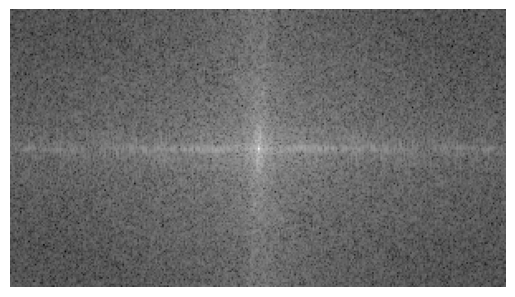

In [47]:
# B2
f_mag = np.log(np.abs(fshift)+1) # Compute Magnitude

# Display Magnitude Spectrum
plt.imshow(f_mag, cmap='gray')
plt.axis("off")
plt.show()

In [48]:
f_phase = np.angle(fshift) # Compute Phase

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [49]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [50]:
# Function to create mask of a radius r passed as a parameter
def create_mask(fshift, r):
    mask = np.zeros(fshift.shape, dtype=np.uint8)
    mask = cv2.circle(mask, (mask.shape[1]//2, mask.shape[0]//2), r, 1, -1)
    return mask

In [51]:
# Function to show 3 images side by side to get a fair understanding
def show_3_images(img1, img2, img3, title1, title2, title3):
  plt.subplot(1,3,1)
  plt.imshow(img1, cmap='gray')
  plt.title(title1)
  plt.axis("off")

  plt.subplot(1,3,2)
  plt.imshow(img2, cmap='gray')
  plt.title(title2)
  plt.axis("off")

  plt.subplot(1,3,3)
  plt.imshow(img3, cmap='gray')
  plt.title(title3)
  plt.axis("off")

  plt.show()

In [52]:
# C1
# For Radius 10
mask_10 = create_mask(fshift, 10)
lpf_10 = mask_10 * fshift # Convolution
filter_10 = np.fft.ifftshift(lpf_10)
inverse_10 = np.fft.ifft2(filter_10) # Inverse FFT

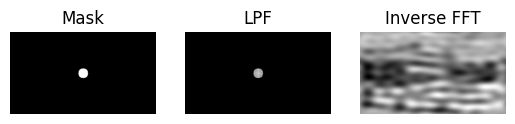

In [53]:
show_3_images(mask_10, np.log(abs(lpf_10)+1), abs(inverse_10), "Mask", "LPF", "Inverse FFT")

In [56]:
# For Radius 30
mask_30 = create_mask(fshift, 30)

lpf_30 = mask_30 * fshift
filter_30 = np.fft.ifftshift(lpf_30)
inverse_30 = np.fft.ifft2(filter_30)

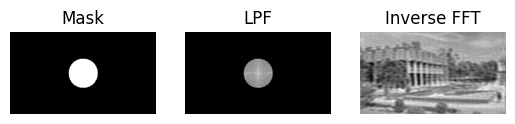

In [57]:
show_3_images(mask_30, np.log(abs(lpf_30)+1), abs(inverse_30), "Mask", "LPF", "Inverse FFT")

In [58]:
# For Radius 80
mask_80 = create_mask(fshift, 80)

lpf_80 = mask_80 * fshift
filter_80 = np.fft.ifftshift(lpf_80)
inverse_80 = np.fft.ifft2(filter_80)

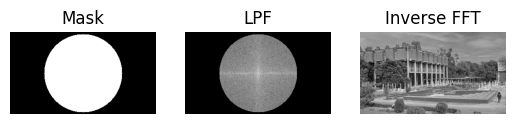

In [59]:
show_3_images(mask_80, np.log(abs(lpf_80)+1), abs(inverse_80), "Mask", "LPF", "Inverse FFT")

observing how blur level changes as we change radius


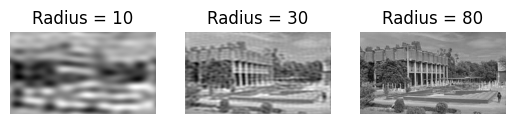

In [61]:
print("observing how blur level changes as we change radius")
show_3_images(abs(inverse_10), abs(inverse_30), abs(inverse_80), "Radius = 10", "Radius = 30", "Radius = 80")

In [64]:
print("In a Low-Pass Filter (LPF), the radius controls how many frequency components are allowed to pass through.High frequencies in an image correspond to edges, fine details, and sharp transitions, while low frequencies correspond to smooth, slowly varying intensity regions. When the radius is large, more high-frequencycomponents are preserved, so the image remains relatively sharp. As the radiusdecreases, the filter removes more high-frequency information, leading to a lossof edges and fine details. This results in a visibly stronger blurring effect.Therefore, blur increases as the cutoff radius decreases because fewer high-frequencycomponents are allowed to pass through the filter.")


In a Low-Pass Filter (LPF), the radius controls how many frequency components are allowed to pass through.High frequencies in an image correspond to edges, fine details, and sharp transitions, while low frequencies correspond to smooth, slowly varying intensity regions. When the radius is large, more high-frequencycomponents are preserved, so the image remains relatively sharp. As the radiusdecreases, the filter removes more high-frequency information, leading to a lossof edges and fine details. This results in a visibly stronger blurring effect.Therefore, blur increases as the cutoff radius decreases because fewer high-frequencycomponents are allowed to pass through the filter.


In [65]:
# C2
# HPF corresponding to radius 10
hpf_10 = (1 - mask_10) * fshift
filter_h10 = np.fft.ifftshift(hpf_10)
inverse_h10 = np.fft.ifft2(np.fft.ifftshift(filter_h10)) # Inverse FFT

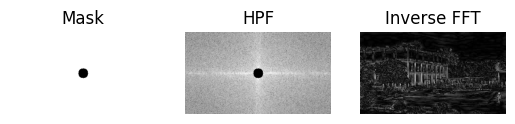

In [66]:
show_3_images(1-mask_10, np.log(abs(hpf_10)+1), abs(inverse_h10), "Mask", "HPF", "Inverse FFT")

In [67]:
# HPF corresponding to radius 30
hpf_30 = (1 - mask_30) * fshift
filter_h30 = np.fft.ifftshift(hpf_30)
inverse_h30 = np.fft.ifft2(np.fft.ifftshift(filter_h30)) # Inverse FFT

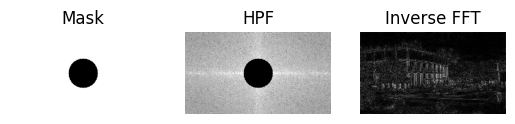

In [68]:
show_3_images(1-mask_30, np.log(abs(hpf_30)+1), abs(inverse_h30), "Mask", "HPF", "Inverse FFT")

In [69]:
# HPF corresponding to radius 80
hpf_80 = (1 - mask_80) * fshift
filter_h80 = np.fft.ifftshift(hpf_80)
inverse_h80 = np.fft.ifft2(np.fft.ifftshift(filter_h80)) # Inverse FFT

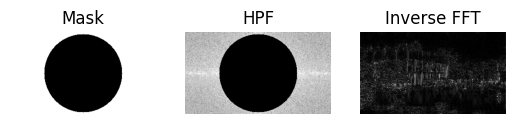

In [70]:
show_3_images(1-mask_80, np.log(abs(hpf_80)+1), abs(inverse_h80), "Mask", "HPF", "Inverse FFT")

Comparing reconstructed images using High Pass Filter corresponding to different radius...


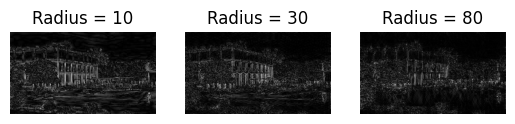

In [71]:
print("Comparing reconstructed images using High Pass Filter corresponding to different radius...")
show_3_images(abs(inverse_h10), abs(inverse_h30), abs(inverse_h80), "Radius = 10", "Radius = 30", "Radius = 80")

In [72]:
# C3
# Square LPF Mask
sqr_lpf_mask = np.zeros(fshift.shape)
row, col = sqr_lpf_mask.shape
sqr_lpf_mask[(row//2-25):(row//2+25), (col//2-25):(col//2+25)] = 1 # Square at center

In [73]:
sqr_lpf = sqr_lpf_mask * fshift
filter_sqr = np.fft.ifftshift(sqr_lpf)
inverse_sqr = np.fft.ifft2(filter_sqr) # Reconstruction of Image

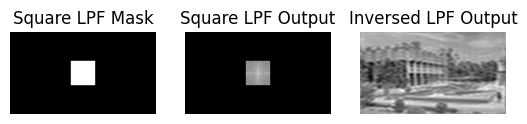

In [74]:
show_3_images(sqr_lpf_mask, np.log(abs(sqr_lpf)+1), abs(inverse_sqr), "Square LPF Mask", "Square LPF Output", "Inversed LPF Output")

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [54]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

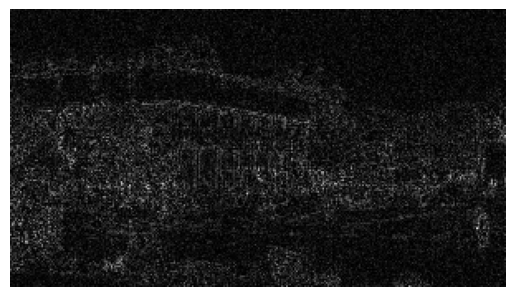

In [76]:
# D1
# Phase-only reconstruction
phase_only = fshift / np.abs(fshift)
phase_only_shift = np.fft.ifftshift(phase_only)
phase_only_img = np.fft.ifft2(phase_only_shift)

# Display
plt.imshow(abs(phase_only_img), cmap='gray')
plt.axis("off")
plt.show()

In [77]:
phase_angle = np.angle(fshift)

# Reconstructing a complex frequency spectrum using only angle
phase_from_angle = np.exp(1j * phase_angle) # exp(jθ) = cos(θ) + j sin(θ)

phase_from_angle_ishift = np.fft.ifftshift(phase_from_angle)
img_phase_from_angle = np.fft.ifft2(phase_from_angle_ishift)
img_phase_from_angle = np.abs(img_phase_from_angle)

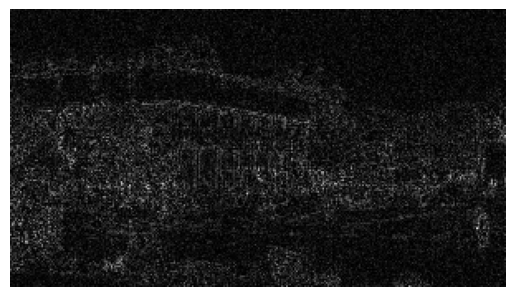

In [78]:
# Display image using np.angle()
plt.imshow(img_phase_from_angle, cmap='gray')
plt.axis("off")
plt.show()

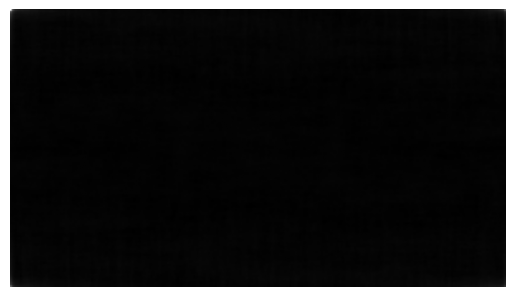

In [79]:
# D2
mag_only = np.abs(fshift)

# Reconstruction
mag_only_shift = np.fft.ifftshift(mag_only)
mag_only_img = np.fft.ifft2(mag_only_shift)

# Display
plt.imshow(abs(mag_only_img), cmap='gray')
plt.axis("off")
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

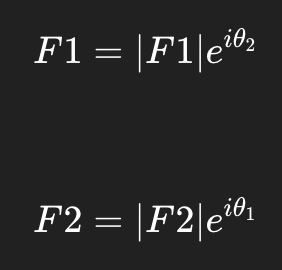

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [55]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [87]:
img1 = cv2.imread("image.jpeg")
img2 = cv2.imread("image 2.jpg")

In [88]:
# Resizing image to same dimension is necessary to exchange the phases of both images
img1 = cv2.resize(img1, (256,256))
img2 = cv2.resize(img2, (256,256))

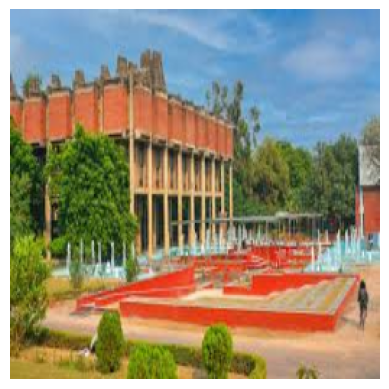

In [89]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis("off")
plt.show()

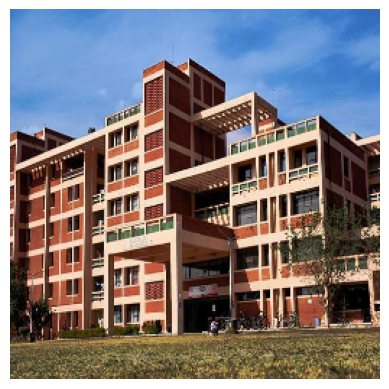

In [90]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis("off")
plt.show()

In [91]:
# Getting fshift for image 1
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
f1 = np.fft.fft2(img1_gray)
fshift1 = np.fft.fftshift(f1)

In [92]:
# Getting fshift for image 2
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
f2 = np.fft.fft2(img2_gray)
fshift2 = np.fft.fftshift(f2)

In [93]:
fshift1_mag = np.abs(fshift1) # Magnitude only for FFT of image 1
fshift1_phase = fshift1 / fshift1_mag # Phase only for FFT of image 1

fshift2_mag = np.abs(fshift2) # Magnitude only for FFT of image 2
fshift2_phase = fshift2 / fshift2_mag # Phase only for FFT of image 2

In [94]:
# Exchanging phases of image using the same magnitude
fshift1_new = fshift1_mag * fshift2_phase
fshift2_new = fshift2_mag * fshift1_phase

In [95]:
fshift1_new_shift = np.fft.ifftshift(fshift1_new)
fshift2_new_shift = np.fft.ifftshift(fshift2_new)

In [96]:
img1_new = np.fft.ifft2(fshift1_new_shift)
img2_new = np.fft.ifft2(fshift2_new_shift)

In [97]:
# Getting the reconstructed image. Using absolute helps in resolving the complex values of pixels
img1_new = np.abs(img1_new)
img2_new = np.abs(img2_new)

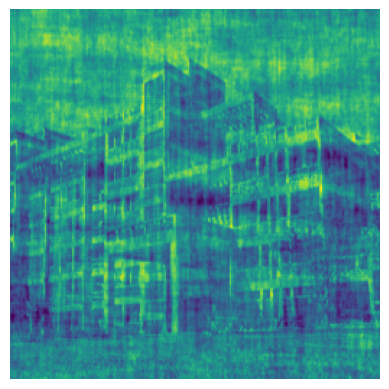

In [98]:
plt.imshow(img1_new)
plt.axis("off")
plt.show()

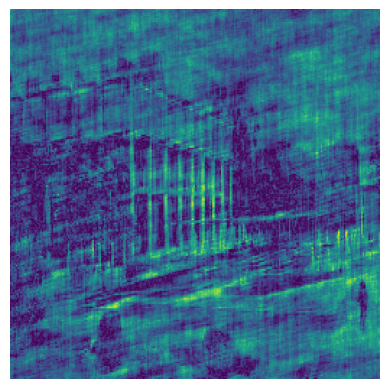

In [99]:
plt.imshow(img2_new)
plt.axis("off")
plt.show()

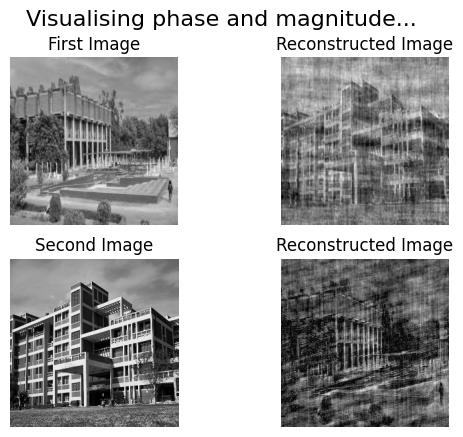

In [104]:
plt.subplot(2,2,1)
plt.imshow(img1_gray, cmap='gray')
plt.title("First Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img1_new, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(img2_gray, cmap='gray')
plt.title("Second Image")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(img2_new, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

plt.suptitle("Visualising phase and magnitude...", fontsize = 16)
plt.show()